# Projeto de IA

In [272]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import math
import random as rd

MAX_ITER = 15

In [597]:
iris = datasets.load_iris()



5.1


In [295]:
def plotter(doc, ks, label):
    X,Y = zip(*doc)
    kx,ky = zip(*ks)

    plt.scatter(x=X,y=Y, marker='o', c=label)
    plt.scatter(x=kx, y=ky, marker='x', color='black', s=150)


In [296]:
def euclidianDistance(p1, p2):
    return math.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )

def 

In [297]:
def goCondition(old_centroids, curr_centroids, itter):
    if itter >= MAX_ITER: return False    
    
    ctd = 0
    for old_centroid,curr_centroid in zip(old_centroids,curr_centroids):
        if abs(old_centroid[0]-curr_centroid[0]) <= 0.001 and\
           abs(old_centroid[1]-curr_centroid[1]) <= 0.001:
               ctd += 1
    if ctd == len(curr_centroids): return False
    
    return True
    

In [411]:
def definePatternship(S, centroids, dist_func):
    color = {cen:i for i,cen in enumerate(centroids)}
    labels = []
    
    for p in S:
        distances = [(dist_func(p, centroid),centroid) for centroid in centroids]
        
        closest_centroid = min(distances, key=lambda x: x[0])[1]
        
        labels.append(color[closest_centroid])
    
    return labels


In [574]:
def defineNewCentroids(S, labels):
    centroids = dict()
    for p,label in zip(S,labels):
        if label not in centroids:
            centroids[label] = {"x":p[0], "y":p[1], "len":1}
        else:
            centroids[label]["x"] += p[0]
            centroids[label]["y"] += p[1]
            centroids[label]["len"] += 1
 
        
    return [(c['x']/c['len'], c['y']/c['len']) for c in centroids.values()]


In [584]:
def kmeans(S, k, dist_func):
    x,y = zip(*S)
    curr_centroids = [tuple(s) for s in rd.sample(S, k)]
    old_centroids  = [tuple(s) for s in rd.sample(S, k)]
    itter = 0
    
    while goCondition(old_centroids, curr_centroids, itter):
        old_centroids = curr_centroids       
        labels = definePatternship(S, old_centroids, dist_func)
        curr_centroids = defineNewCentroids(S, labels)
        itter += 1
        
    print(itter)
    return labels,old_centroids


4
[0, 0, 0, 0, 1, 1, 1, 1, 1]


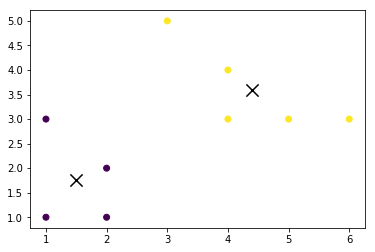

In [592]:
document = [[1,1], [2,1], [2,2], [1,3],\
            [3,5], [4,3], [4,4], [5,3],[6,3]]

K = 2

label, centroids = kmeans(document, K, euclidianDistance)
print(label)
plotter(document, centroids, label)
